In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
import os

In [18]:
data = pd.read_csv("data_concatVectors.csv",header=None)
data = data.sample(frac=1)
data = data.reset_index(drop=True)
labels = data[0]
data = data.drop(0,axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = np.asarray(y_train.values.tolist())
y_test = np.asarray(y_test.values.tolist())

In [19]:
def modelAccuracy(modelname, predictions, test_gs):
    mcounter = 0
    for i in range(len(predictions)):
        if(predictions[i]!=test_gs[i]):
            mcounter+=1
    print(str(modelname)+" accuracy: "+str((1-(mcounter/len(predictions)))))
    return (1-(mcounter/len(predictions)))


In [20]:
def displayStats(predictions, truth):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    cmat = confusion_matrix(truth,predictions)
    disp = ConfusionMatrixDisplay(cmat)
    disp.plot()
    plt.show()

# Basic Catboost Classifier to establish a baseline

---

In [21]:
from catboost import CatBoostClassifier
cbm = CatBoostClassifier()
cbm.fit(X_train,y_train)

Learning rate set to 0.003649
0:	learn: 0.6910188	total: 80.1ms	remaining: 1m 20s
1:	learn: 0.6887929	total: 159ms	remaining: 1m 19s
2:	learn: 0.6868680	total: 242ms	remaining: 1m 20s
3:	learn: 0.6850895	total: 320ms	remaining: 1m 19s
4:	learn: 0.6836726	total: 392ms	remaining: 1m 18s
5:	learn: 0.6816538	total: 467ms	remaining: 1m 17s
6:	learn: 0.6799791	total: 542ms	remaining: 1m 16s
7:	learn: 0.6783407	total: 618ms	remaining: 1m 16s
8:	learn: 0.6763588	total: 695ms	remaining: 1m 16s
9:	learn: 0.6736832	total: 772ms	remaining: 1m 16s
10:	learn: 0.6716982	total: 850ms	remaining: 1m 16s
11:	learn: 0.6699454	total: 929ms	remaining: 1m 16s
12:	learn: 0.6684863	total: 999ms	remaining: 1m 15s
13:	learn: 0.6665520	total: 1.07s	remaining: 1m 15s
14:	learn: 0.6650881	total: 1.15s	remaining: 1m 15s
15:	learn: 0.6635218	total: 1.22s	remaining: 1m 15s
16:	learn: 0.6613344	total: 1.3s	remaining: 1m 15s
17:	learn: 0.6595610	total: 1.38s	remaining: 1m 15s
18:	learn: 0.6580026	total: 1.44s	remaining:

In [22]:
pred_test = cbm.predict(X_test)
modelAccuracy("CatBoost", pred_test, y_test)
soft_preds = cbm.predict_proba(X_test)[:,1]
print("CatBoost ROC-AUC: "+ str(roc_auc_score(y_test,soft_preds)))

CatBoost accuracy: 0.7966101694915254
CatBoost ROC-AUC: 0.8444700460829493


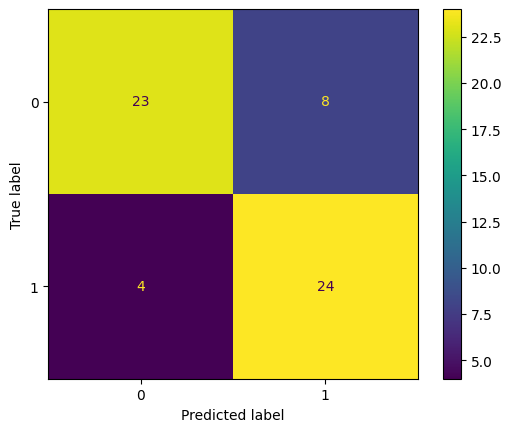

In [23]:
displayStats(pred_test,y_test)

# Sanity Checking
---
Catboost accuracy is better than expected, so we want to ensure that the dataset is not messed up in any way. As such, we're going to train catboost on completely random data of the same shape, and make sure that it does worse than our actual dataset.

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(88, 2040)
(59, 2040)
(88,)
(59,)


In [25]:
rand_X_train = np.random.rand(X_train.shape[0],X_train.shape[1])
rand_X_train.shape

(88, 2040)

In [26]:
cbm2 = CatBoostClassifier()
cbm2.fit(rand_X_train,y_train)

Learning rate set to 0.003649
0:	learn: 0.6913333	total: 60ms	remaining: 60s
1:	learn: 0.6897991	total: 132ms	remaining: 1m 5s
2:	learn: 0.6876446	total: 208ms	remaining: 1m 9s
3:	learn: 0.6852537	total: 281ms	remaining: 1m 10s
4:	learn: 0.6839355	total: 358ms	remaining: 1m 11s
5:	learn: 0.6820634	total: 443ms	remaining: 1m 13s
6:	learn: 0.6807883	total: 517ms	remaining: 1m 13s
7:	learn: 0.6788070	total: 592ms	remaining: 1m 13s
8:	learn: 0.6767359	total: 669ms	remaining: 1m 13s
9:	learn: 0.6752128	total: 745ms	remaining: 1m 13s
10:	learn: 0.6730305	total: 822ms	remaining: 1m 13s
11:	learn: 0.6710193	total: 897ms	remaining: 1m 13s
12:	learn: 0.6692870	total: 973ms	remaining: 1m 13s
13:	learn: 0.6673749	total: 1.05s	remaining: 1m 14s
14:	learn: 0.6653960	total: 1.13s	remaining: 1m 14s
15:	learn: 0.6637629	total: 1.2s	remaining: 1m 14s
16:	learn: 0.6619805	total: 1.28s	remaining: 1m 14s
17:	learn: 0.6599193	total: 1.36s	remaining: 1m 14s
18:	learn: 0.6580859	total: 1.44s	remaining: 1m 14s

In [27]:
pred_test2 = cbm2.predict(X_test)
modelAccuracy("CatBoost RANDOM", pred_test2, y_test)
soft_preds2 = cbm2.predict_proba(X_test)[:,1]
print("CatBoost RANDOM ROC-AUC: "+ str(roc_auc_score(y_test,soft_preds2)))

CatBoost RANDOM accuracy: 0.5084745762711864
CatBoost RANDOM ROC-AUC: 0.4078341013824885


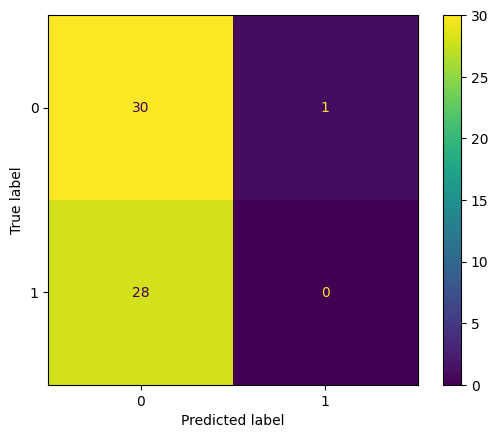

In [28]:
displayStats(pred_test2,y_test)

## Conclusions
---
We can see that with completely random data the catboost classifier hovers around 50%. As such, we know our data is actually doing something, because without it, we are effectively predicting on random chance. 

However, each time we run this notebook, we find that the accuracy and ROC-AUC of the classifier varies greatly. This could be due to the classifier not generalizing to the dataset well enough. This could be related to the relatively small size of the dataset.